In [1]:
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Disaggregated_data_stunting_csv.csv", encoding="latin1")

In [3]:
df.head()

,Countries_and_areas,UNICEF_Regions,UN_Regions,WHO_Regions,World_Bank_Income_Groups,Year,Full_Source_Title,Latest_Estimate,Estimate_Type,_National_Point_Estimate,...,Male_48_to_59_months_Point_Estimate,Male_24_to_59_months_Point_Estimate,Female_0_to_5_months_Point_Estimate,Female_6_to_11_months_Point_Estimate,Female_12_to_23_months_Point_Estimate,Female_0_to_23_months_Point_Estimate,Female_24_to_35_months_Point_Estimate,Female_36_to_47_months_Point_Estimate,Female_48_to_59_months_Point_Estimate,Female_24_to_59_months_Point_Estimate
0,Afghanistan,SA,Asia,EMRO,Low Income,1997,Afghanistan 1997 multiple indicator baseline (...,Historical Trend,Adjusted,53.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,SA,Asia,EMRO,Low Income,2004,Summary report of the national nutrition surve...,Historical Trend,External Reanalysis,59.3,...,62.5,NaN,NaN,36.5,51.1,NaN,70.4,64.2,61.4,NaN
2,Afghanistan,SA,Asia,EMRO,Low Income,2013,Afghanistan National Nutrition Survey 2013,Historical Trend,Reanalyzed,40.4,...,40.0,44.1,21.3,27.1,37.5,30.6,45.9,46.0,46.6,46.1
3,Afghanistan,SA,Asia,EMRO,Low Income,2018,Afghanistan Health Survey 2018,Latest Source,Reanalyzed,38.2,...,45.2,45.9,14.5,17.3,28.8,22.4,46.8,47.1,50.3,47.9
4,Albania,EECA,Europe,EURO,Upper Middle Income,2005,Albania multiple indicator cluster survey 2005...,Historical Trend,Reanalyzed,26.7,...,27.3,28.4,26.6,23.2,18.6,21.9,21.6,31.4,21.7,24.7


In [4]:
df.shape, df.columns

((1051, 83),
 Index(['Countries_and_areas', 'UNICEF_Regions', 'UN_Regions', 'WHO_Regions',
        'World_Bank_Income_Groups', 'Year', 'Full_Source_Title',
        'Latest_Estimate', 'Estimate_Type', '_National_Point_Estimate',
        'Male_Point_Estimate', 'Female_Point_Estimate', 'Urban_Point_Estimate',
        'Rural_Point_Estimate', '0_to_5_months_Point_Estimate',
        '6_to_11_months_Point_Estimate', '12_to_23_months_Point_Estimate',
        '0_to_23_months_Point_Estimate', '24_to_35_months_Point_Estimate',
        '36_to_47_months_Point_Estimate', '48_to_59_months_Point_Estimate',
        '24_to_59_months_Point_Estimate', 'Wealth_Quintile_1_Point_Estimate',
        'Wealth_Quintile_2_Point_Estimate', 'Wealth_Quintile_3_Point_Estimate',
        'Wealth_Quintile_4_Point_Estimate', 'Wealth_Quintile_5_Point_Estimate',
        'Bottom_80%_Point_Estimate', 'Top_20%_Point_Estimate',
        'Bottom_60%_Point_Estimate', 'Top_40%_Point_Estimate',
        'Bottom_40%_Point_Estimate', '

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Countries_and_areas                                   1051 non-null   object 
 1   UNICEF_Regions                                        1040 non-null   object 
 2   UN_Regions                                            1051 non-null   object 
 3   WHO_Regions                                           1051 non-null   object 
 4   World_Bank_Income_Groups                              1051 non-null   object 
 5   Year                                                  1051 non-null   int64  
 6   Full_Source_Title                                     1051 non-null   object 
 7   Latest_Estimate                                       1051 non-null   object 
 8   Estimate_Type                                         1051

In [6]:
df.rename(columns={'Countries_and_areas':'Country','_National_Point_Estimate':'National_Point_Estimate'},inplace=True)

In [7]:
df['Country'].value_counts()

Bangladesh           30
Viet Nam             27
Niger                23
Jamaica              22
Kuwait               21
                     ..
Brunei Darussalam     1
Greece                1
Japan                 1
Marshall Islands      1
Portugal              1
Name: Country, Length: 159, dtype: int64

In [8]:
df.groupby(['Year','World_Bank_Income_Groups', 'Country']).agg({'Country':'count'})

Country
Year World_Bank_Income_Groups Country                             
1983 Lower Middle Income      Papua New Guinea                   1
1985 Low Income               Niger                              1
     Lower Middle Income      Cabo Verde                         1
                              Kiribati                           1
     Upper Middle Income      Mauritius                          1
...                                                            ...
2022 Low Income               Niger                              1
     Lower Middle Income      Kenya                              1
                              Mauritania                         1
                              Nepal                              1
                              United Republic of Tanzania        1

[1013 rows x 1 columns]

In [9]:
df[df['Year']==1991]['Country'].value_counts()

Bangladesh                            1
Oman                                  1
Venezuela (Bolivarian Republic of)    1
United States                         1
United Republic of Tanzania           1
Senegal                               1
Romania                               1
Peru                                  1
Pakistan                              1
Myanmar                               1
Cameroon                              1
Jamaica                               1
Iraq                                  1
India                                 1
Honduras                              1
Egypt                                 1
Dominican Republic                    1
Czechia                               1
Yemen                                 1
Name: Country, dtype: int64

In [10]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Cuba', 'Czechia',
       "Cote d'Ivoire", "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iran (Islamic Re

## Plot correlation for verification

In [11]:
non_null_columns = ['National_Point_Estimate']
object_cols = ['Country', 'UNICEF_Regions', 'UN_Regions', 'WHO_Regions',
        'World_Bank_Income_Groups', 'Year', 'Full_Source_Title',
        'Latest_Estimate', 'Estimate_Type', 'National_Point_Estimate']
null_cols_to_fillna = list(df.drop(object_cols, 1).columns)

C:\Users\shara\AppData\Local\Temp\ipykernel_18684\3765070173.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  null_cols_to_fillna = list(df.drop(object_cols, 1).columns)


In [12]:
len(null_cols_to_fillna)

73

In [13]:
df[df['Country']=='India'][null_cols_to_fillna + non_null_columns]

,Male_Point_Estimate,Female_Point_Estimate,Urban_Point_Estimate,Rural_Point_Estimate,0_to_5_months_Point_Estimate,6_to_11_months_Point_Estimate,12_to_23_months_Point_Estimate,0_to_23_months_Point_Estimate,24_to_35_months_Point_Estimate,36_to_47_months_Point_Estimate,...,Male_24_to_59_months_Point_Estimate,Female_0_to_5_months_Point_Estimate,Female_6_to_11_months_Point_Estimate,Female_12_to_23_months_Point_Estimate,Female_0_to_23_months_Point_Estimate,Female_24_to_35_months_Point_Estimate,Female_36_to_47_months_Point_Estimate,Female_48_to_59_months_Point_Estimate,Female_24_to_59_months_Point_Estimate,National_Point_Estimate
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7
374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9
375,58.4,55.8,50.2,59.2,27.3,39.5,58.7,45.8,69.4,71.1,...,70.5,24.2,37.5,57.5,43.7,69.0,71.0,NaN,70.0,57.1
376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.9
377,51.1,50.8,41.1,54.0,27.5,36.6,58.4,44.5,65.7,NaN,...,64.8,27.0,34.8,57.9,44.0,66.6,NaN,NaN,66.6,51.0
378,47.8,47.8,39.5,50.4,22.6,30.3,52.3,39.5,55.5,54.0,...,52.4,22.4,28.8,51.8,38.5,55.2,55.1,51.3,53.9,47.8
379,39.5,37.9,32.0,41.6,17.1,NaN,NaN,NaN,42.8,44.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.7
380,38.3,37.5,30.6,40.7,20.6,23.5,42.7,32.6,41.8,42.6,...,40.8,19.2,21.0,40.4,30.5,41.4,43.4,41.1,42.0,37.9
381,35.4,34.0,27.3,37.0,8.9,NaN,NaN,NaN,44.3,41.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.7
382,36.2,34.6,30.1,37.3,24.4,24.7,39.8,32.2,38.1,39.2,...,37.4,22.6,22.4,37.3,29.9,37.4,39.5,36.3,37.7,35.5


In [14]:
corr_vals = []
for col in null_cols_to_fillna:
    df_new = df[[col, 'National_Point_Estimate']]
    df_new = df_new.dropna()
    corr_vals.append(round(df_new.corr().loc[col]['National_Point_Estimate'], 4))
df_corr = pd.DataFrame({'columns':null_cols_to_fillna, 'correlation':corr_vals})

In [15]:
df_corr

,columns,correlation
0,Male_Point_Estimate,0.9969
1,Female_Point_Estimate,0.9964
2,Urban_Point_Estimate,0.9521
3,Rural_Point_Estimate,0.9746
4,0_to_5_months_Point_Estimate,0.6637
...,...,...
68,Female_0_to_23_months_Point_Estimate,0.9466
69,Female_24_to_35_months_Point_Estimate,0.9736
70,Female_36_to_47_months_Point_Estimate,0.9775
71,Female_48_to_59_months_Point_Estimate,0.9599


In [18]:
df_corr['correlation'].describe()

count    73.000000
mean      0.927430
std       0.081897
min       0.602800
25%       0.912300
50%       0.954200
75%       0.976100
max       0.998100
Name: correlation, dtype: float64

In [19]:
sns.heatmap(df_corr, x='columns', y='correlation')
plt.xticks(rotation=90)

ValueError: could not convert string to float: 'Male_Point_Estimate'

## FillNA using LinearRegression because of high correlation

In [20]:
df_clean = df.copy()
for col in null_cols_to_fillna:
    df_new = df[[col, 'National_Point_Estimate']].dropna()
    lr = LinearRegression()
    lr.fit(df_new[['National_Point_Estimate']], df_new[col])
    #print(f"{col} - {lr.coef_} - {lr.intercept_}")
    df_clean[col].fillna(pd.Series(lr.predict(df_clean[['National_Point_Estimate']])), inplace=True)

In [21]:
for col in null_cols_to_fillna:
    print(f"{col} - {(df_clean[col] == df[col]).sum()}")

Male_Point_Estimate - 860
Female_Point_Estimate - 860
Urban_Point_Estimate - 661
Rural_Point_Estimate - 660
0_to_5_months_Point_Estimate - 755
6_to_11_months_Point_Estimate - 806
12_to_23_months_Point_Estimate - 815
0_to_23_months_Point_Estimate - 758
24_to_35_months_Point_Estimate - 827
36_to_47_months_Point_Estimate - 799
48_to_59_months_Point_Estimate - 788
24_to_59_months_Point_Estimate - 762
Wealth_Quintile_1_Point_Estimate - 462
Wealth_Quintile_2_Point_Estimate - 463
Wealth_Quintile_3_Point_Estimate - 463
Wealth_Quintile_4_Point_Estimate - 463
Wealth_Quintile_5_Point_Estimate - 463
Bottom_80%_Point_Estimate - 438
Top_20%_Point_Estimate - 438
Bottom_60%_Point_Estimate - 438
Top_40%_Point_Estimate - 438
Bottom_40%_Point_Estimate - 438
Top_60%_Point_Estimate - 438
Bottom_20%_Point_Estimate - 437
Top_80%_Point_Estimate - 438
Mother_No_Education_Point_Estimate - 356
Mother_Primary_Education_Point_Estimate - 424
Mother_None_and_Primary_Education_Point_Estimate - 433
Mother_Secondary_Ed

In [22]:
df_corr[df_corr['correlation']<0.7]

,columns,correlation
4,0_to_5_months_Point_Estimate,0.6637
29,Mother_Higher_Education_Point_Estimate,0.6028
57,Male_0_to_5_months_Point_Estimate,0.6372
65,Female_0_to_5_months_Point_Estimate,0.6520


# Visualisations

### Line plot of National Point Estimate for few countries 

In [23]:
lst_countries = ['India','China','Bangladesh','United States','Pakistan']
df_time_series = df_clean[df_clean['Country'].isin(lst_countries)][['Country','Year','National_Point_Estimate']]

Text(0.5, 1.0, 'Prevalence of stunting across the Indian Subcontinent 1985-2020')

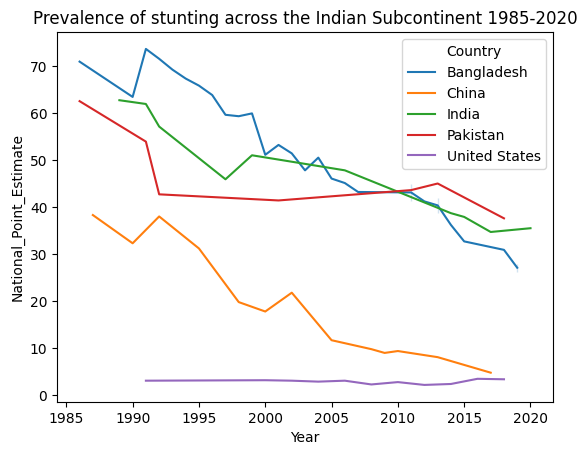

In [24]:
sns.lineplot(df_time_series,x='Year',y='National_Point_Estimate',hue='Country')
plt.title("Prevalence of stunting across the Indian Subcontinent 1985-2020")

### Gender comparison across income groups of countries

In [25]:
df['Year'].sort_values().unique()

array([1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [26]:
def get_year_group(x):
    if x<2000:
        return '90s'
    elif x >= 2000 and x < 2010:
        return '2000s'
    else:
        return '2010+'
    
df_clean['year_group'] = df_clean['Year'].apply(lambda x: get_year_group(x))
df_clean['year_group'].value_counts()

2010+    454
2000s    322
90s      275
Name: year_group, dtype: int64

In [27]:
df_clean.columns

Index(['Country', 'UNICEF_Regions', 'UN_Regions', 'WHO_Regions',
       'World_Bank_Income_Groups', 'Year', 'Full_Source_Title',
       'Latest_Estimate', 'Estimate_Type', 'National_Point_Estimate',
       'Male_Point_Estimate', 'Female_Point_Estimate', 'Urban_Point_Estimate',
       'Rural_Point_Estimate', '0_to_5_months_Point_Estimate',
       '6_to_11_months_Point_Estimate', '12_to_23_months_Point_Estimate',
       '0_to_23_months_Point_Estimate', '24_to_35_months_Point_Estimate',
       '36_to_47_months_Point_Estimate', '48_to_59_months_Point_Estimate',
       '24_to_59_months_Point_Estimate', 'Wealth_Quintile_1_Point_Estimate',
       'Wealth_Quintile_2_Point_Estimate', 'Wealth_Quintile_3_Point_Estimate',
       'Wealth_Quintile_4_Point_Estimate', 'Wealth_Quintile_5_Point_Estimate',
       'Bottom_80%_Point_Estimate', 'Top_20%_Point_Estimate',
       'Bottom_60%_Point_Estimate', 'Top_40%_Point_Estimate',
       'Bottom_40%_Point_Estimate', 'Top_60%_Point_Estimate',
       'Bottom_

In [28]:
df_gend_sct = pd.DataFrame()
cols_reqd = ['Male_Point_Estimate', 'Female_Point_Estimate', 'year_group', 'Country', 'World_Bank_Income_Groups']
for grp, df_grp in df_clean.groupby(['year_group', 'Country']):
    max_year = df_grp['Year'].max()
    if df_grp[df_grp['Year']==max_year].shape[0] == 1:
        df_gend_sct = pd.concat([df_gend_sct, df_grp[df_grp['Year']==max_year][cols_reqd]])
    else:
        df_gend_sct = pd.concat([df_gend_sct, df_grp[df_grp['Year']==max_year].sample(1)[cols_reqd]])
#         print(f"For {grp} there are more than 1 row")

In [29]:
df_gend_sct.shape

(402, 5)

Text(0.5, 1.0, 'Male vs Female comparison of stunting prevalence in the 1990s')

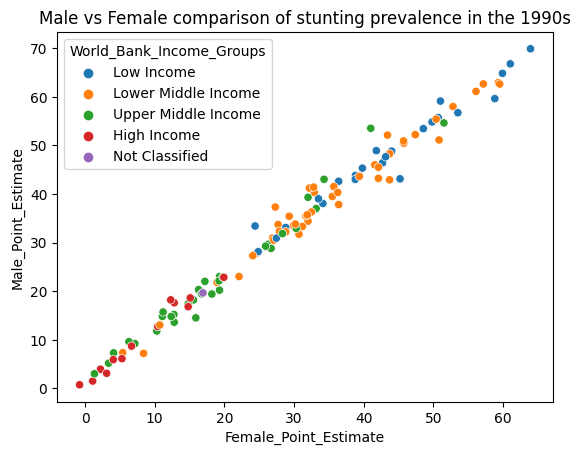

In [30]:
sns.scatterplot(df_gend_sct[df_gend_sct['year_group'] == '90s'],x='Female_Point_Estimate',y='Male_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Male vs Female comparison of stunting prevalence in the 1990s")

Text(0.5, 1.0, 'Male vs Female comparison of stunting prevalence in the 2000s')

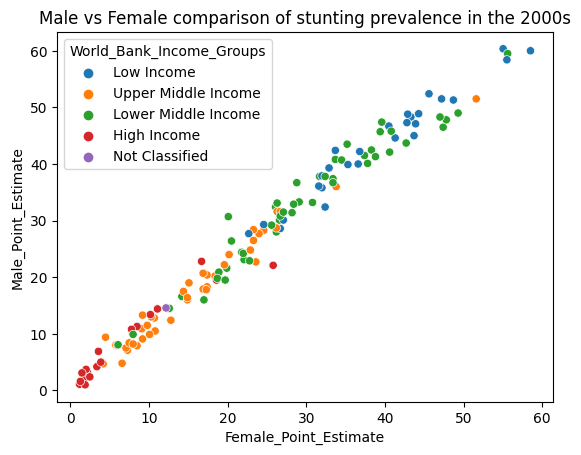

In [32]:
sns.scatterplot(df_gend_sct[df_gend_sct['year_group'] == '2000s'],x='Female_Point_Estimate',y='Male_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Male vs Female comparison of stunting prevalence in the 2000s")

Text(0.5, 1.0, 'Male vs Female comparison of stunting prevalence in the 2010s')

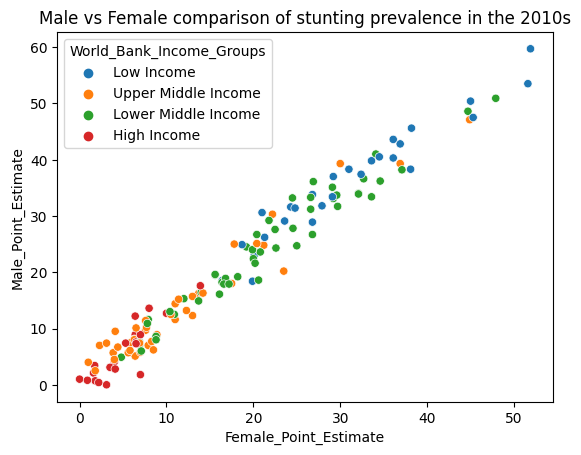

In [31]:
sns.scatterplot(df_gend_sct[df_gend_sct['year_group'] == '2010+'],x='Female_Point_Estimate',y='Male_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Male vs Female comparison of stunting prevalence in the 2010s")

### The above graphs show that malnutrition is not skewed by gender. 
### With time, the malnutrition numbers are reducing in middle and low income countries


In [33]:

df_gend_sct[(df_gend_sct['Country'].isin(lst_countries))]

,Male_Point_Estimate,Female_Point_Estimate,year_group,Country,World_Bank_Income_Groups
56,43.700000,42.700000,2000s,Bangladesh,Lower Middle Income
190,10.029658,7.926002,2000s,China,Upper Middle Income
378,47.800000,47.800000,2000s,India,Lower Middle Income
695,42.100000,40.600000,2000s,Pakistan,Lower Middle Income
955,3.100000,1.500000,2000s,United States,High Income
65,27.801690,24.559938,2010+,Bangladesh,Lower Middle Income
193,5.689976,3.864227,2010+,China,Upper Middle Income
382,36.200000,34.600000,2010+,India,Lower Middle Income
698,38.200000,37.100000,2010+,Pakistan,Lower Middle Income
960,2.800000,4.100000,2010+,United States,High Income


## Urban/Rural comparison across income groups of countries

In [34]:
df_geo_sct = pd.DataFrame()
cols_reqd = ['Urban_Point_Estimate', 'Rural_Point_Estimate', 'year_group', 'Country', 'World_Bank_Income_Groups']
for grp, df_grp in df_clean.groupby(['year_group', 'Country']):
    max_year = df_grp['Year'].max()
    if df_grp[df_grp['Year']==max_year].shape[0] == 1:
        df_geo_sct = pd.concat([df_geo_sct, df_grp[df_grp['Year']==max_year][cols_reqd]])
    else:
        df_geo_sct = pd.concat([df_geo_sct, df_grp[df_grp['Year']==max_year].sample(1)[cols_reqd]])
#         print(f"For {grp} there are more than 1 row")

In [35]:
df_geo_sct.shape

(402, 5)

In [36]:
df_geo_sct.head()

,Urban_Point_Estimate,Rural_Point_Estimate,year_group,Country,World_Bank_Income_Groups
1,45.708674,63.162276,2000s,Afghanistan,Low Income
5,22.700000,23.500000,2000s,Albania,Upper Middle Income
12,14.400000,16.600000,2000s,Algeria,Lower Middle Income
16,22.721006,32.604126,2000s,Angola,Lower Middle Income
20,5.919389,10.269266,2000s,Argentina,Upper Middle Income


Text(0.5, 1.0, 'Urban vs Rural comparison of stunting prevalence in the 1990s')

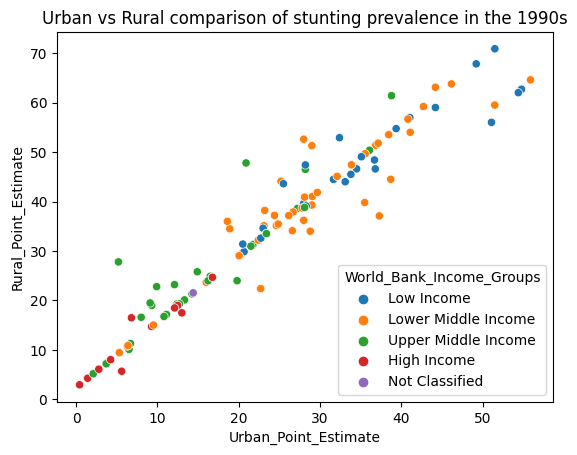

In [37]:
sns.scatterplot(df_geo_sct[df_geo_sct['year_group'] == '90s'],x='Urban_Point_Estimate',y='Rural_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Urban vs Rural comparison of stunting prevalence in the 1990s")

Text(0.5, 1.0, 'Urban vs Rural comparison of stunting prevalence in the 2000s')

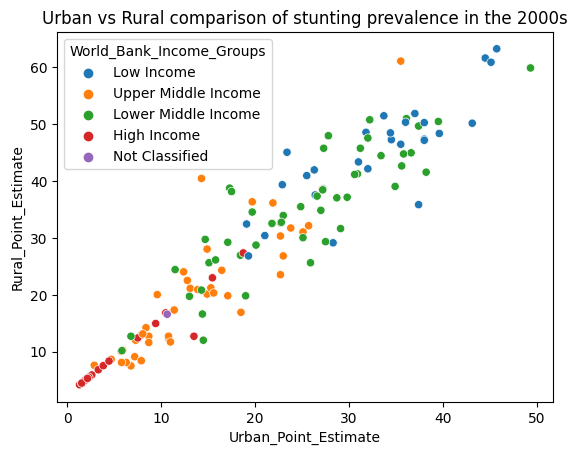

In [38]:
sns.scatterplot(df_geo_sct[df_geo_sct['year_group'] == '2000s'],x='Urban_Point_Estimate',y='Rural_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Urban vs Rural comparison of stunting prevalence in the 2000s")

Text(0.5, 1.0, 'Urban vs Rural comparison of stunting prevalence in the 2010s')

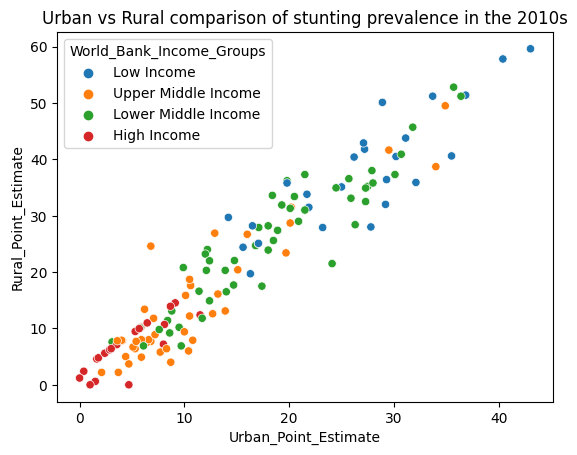

In [39]:
sns.scatterplot(df_geo_sct[df_geo_sct['year_group'] == '2010+'],x='Urban_Point_Estimate',y='Rural_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Urban vs Rural comparison of stunting prevalence in the 2010s")

### The above graphs show that malnutrition is not skewed by settlement area. 
### With time, the malnutrition numbers are reducing in middle and low income countries. 
### Most high income countries have managed to contain stunting numbers within 10 points by the 2010s


In [41]:
df_geo_sct[(df_geo_sct['Country'].isin(lst_countries))]

,Urban_Point_Estimate,Rural_Point_Estimate,year_group,Country,World_Bank_Income_Groups
56,36.600000,44.900000,2000s,Bangladesh,Lower Middle Income
190,7.294066,12.096663,2000s,China,Upper Middle Income
378,39.500000,50.400000,2000s,India,Lower Middle Income
695,35.800000,44.700000,2000s,Pakistan,Lower Middle Income
955,2.177210,5.294683,2000s,United States,High Income
66,26.300000,28.400000,2010+,Bangladesh,Lower Middle Income
193,4.086485,7.832736,2010+,China,Upper Middle Income
382,30.100000,37.300000,2010+,India,Lower Middle Income
698,30.700000,40.900000,2010+,Pakistan,Lower Middle Income
960,3.017291,6.411426,2010+,United States,High Income


## Mother's education comparison across income groups of countries

In [42]:
df_mom_ed_sct = pd.DataFrame()
cols_reqd = ['Mother_None_and_Primary_Education_Point_Estimate', 'Mother_Secondary_and_Higher_Education_Point_Estimate', 'year_group', 'Country', 'World_Bank_Income_Groups']
for grp, df_grp in df_clean.groupby(['year_group', 'Country']):
    max_year = df_grp['Year'].max()
    if df_grp[df_grp['Year']==max_year].shape[0] == 1:
        df_mom_ed_sct = pd.concat([df_mom_ed_sct, df_grp[df_grp['Year']==max_year][cols_reqd]])
    else:
        df_mom_ed_sct = pd.concat([df_mom_ed_sct, df_grp[df_grp['Year']==max_year].sample(1)[cols_reqd]])
#         print(f"For {grp} there are more than 1 row")

In [43]:
df_mom_ed_sct.shape

(402, 5)

Text(0.5, 1.0, "Mother's education comparison of stunting prevalence in the 1990s")

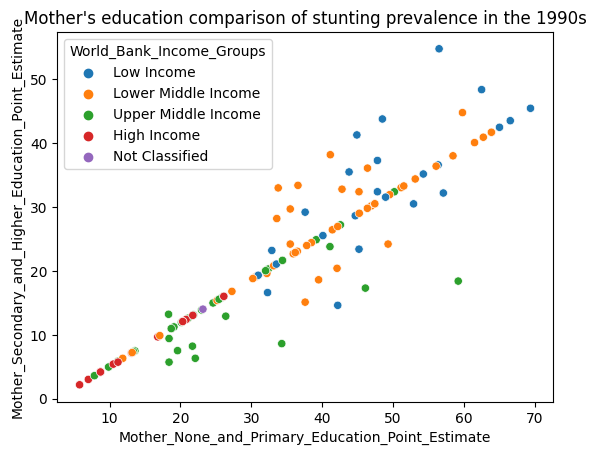

In [44]:
sns.scatterplot(df_mom_ed_sct[df_mom_ed_sct['year_group'] == '90s'],x='Mother_None_and_Primary_Education_Point_Estimate',y='Mother_Secondary_and_Higher_Education_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Mother's education comparison of stunting prevalence in the 1990s")

Text(0.5, 1.0, "Mother's education comparison of stunting prevalence in the 2000s")

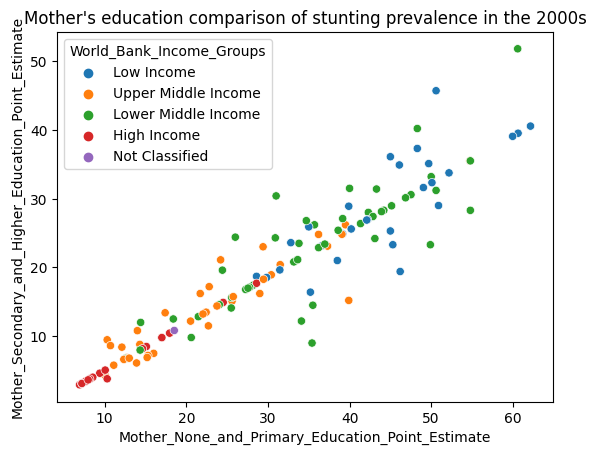

In [45]:
sns.scatterplot(df_mom_ed_sct[df_mom_ed_sct['year_group'] == '2000s'],x='Mother_None_and_Primary_Education_Point_Estimate',y='Mother_Secondary_and_Higher_Education_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Mother's education comparison of stunting prevalence in the 2000s")

Text(0.5, 1.0, "Mother's education comparison of stunting prevalence in the 2010s")

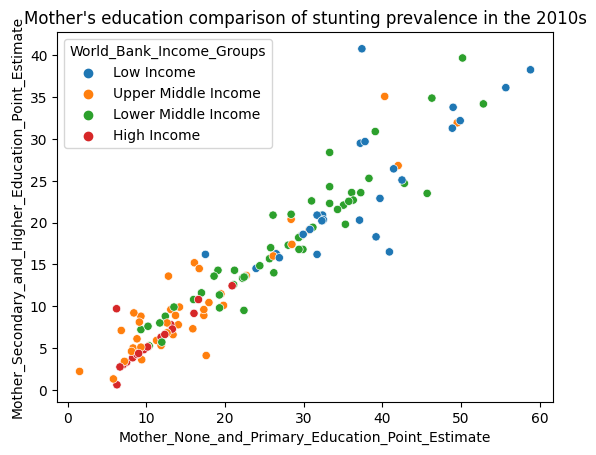

In [46]:
sns.scatterplot(df_mom_ed_sct[df_mom_ed_sct['year_group'] == '2010+'],x='Mother_None_and_Primary_Education_Point_Estimate',y='Mother_Secondary_and_Higher_Education_Point_Estimate',hue='World_Bank_Income_Groups')
plt.title("Mother's education comparison of stunting prevalence in the 2010s")

### The above graphs shows that the mother’s education level has some effect on the child’s health with secondary or higher educated mothers’ children showing lesser stunting as shown by the reduction in slope in the above plots over time.  


In [50]:
df_mom_ed_sct[(df_mom_ed_sct['Country'].isin(lst_countries))]

,Mother_None_and_Primary_Education_Point_Estimate,Mother_Secondary_and_Higher_Education_Point_Estimate,year_group,Country,World_Bank_Income_Groups
56,50.000000,33.200000,2000s,Bangladesh,Lower Middle Income
190,14.335907,7.978904,2000s,China,Upper Middle Income
378,54.800000,35.500000,2000s,India,Lower Middle Income
695,45.147334,28.961559,2000s,Pakistan,Lower Middle Income
955,7.964408,3.639898,2000s,United States,High Income
66,36.100000,23.600000,2010+,Bangladesh,Lower Middle Income
193,10.341833,5.258930,2010+,China,Upper Middle Income
382,46.300000,34.900000,2010+,India,Lower Middle Income
698,45.700000,23.500000,2010+,Pakistan,Lower Middle Income
960,9.010475,4.352273,2010+,United States,High Income


## Malnutrition distribution across Wealth quintile 

In [48]:
ftrs_sel = ['World_Bank_Income_Groups', 'Wealth_Quintile_1_Point_Estimate',
       'Wealth_Quintile_2_Point_Estimate', 'Wealth_Quintile_3_Point_Estimate',
       'Wealth_Quintile_4_Point_Estimate', 'Wealth_Quintile_5_Point_Estimate', 'year_group']
df_wealth = df_clean[ftrs_sel]

In [53]:
df_wealth_box.columns

Index(['World_Bank_Income_Groups', 'year_group', 'quintile', 'point_est'], dtype='object')

In [51]:
df_wealth_box = pd.melt(df_wealth, id_vars=['World_Bank_Income_Groups', 'year_group'], 
                        value_vars=['Wealth_Quintile_1_Point_Estimate',
       'Wealth_Quintile_2_Point_Estimate', 'Wealth_Quintile_3_Point_Estimate',
       'Wealth_Quintile_4_Point_Estimate', 'Wealth_Quintile_5_Point_Estimate'])
df_wealth_box.rename(columns={'variable':'quintile', 'value':'point_est'}, inplace=True)

def get_short_quintile(x):
    if x == 'Wealth_Quintile_1_Point_Estimate':
        return 'WQ1'
    elif x == 'Wealth_Quintile_2_Point_Estimate':
        return 'WQ2'
    elif x == 'Wealth_Quintile_3_Point_Estimate':
        return 'WQ3'
    elif x == 'Wealth_Quintile_4_Point_Estimate':
        return 'WQ4'
    else:
        return 'WQ5'
    
df_wealth_box['quintile'] = df_wealth_box['quintile'].apply(lambda x: get_short_quintile(x))

In [54]:
df_wealth_box = df_wealth_box[df_wealth_box['World_Bank_Income_Groups']!='Not Classified']

Text(0.5, 1.0, 'Stunting prevalence distribution on family wealth across country groups in 1990s')

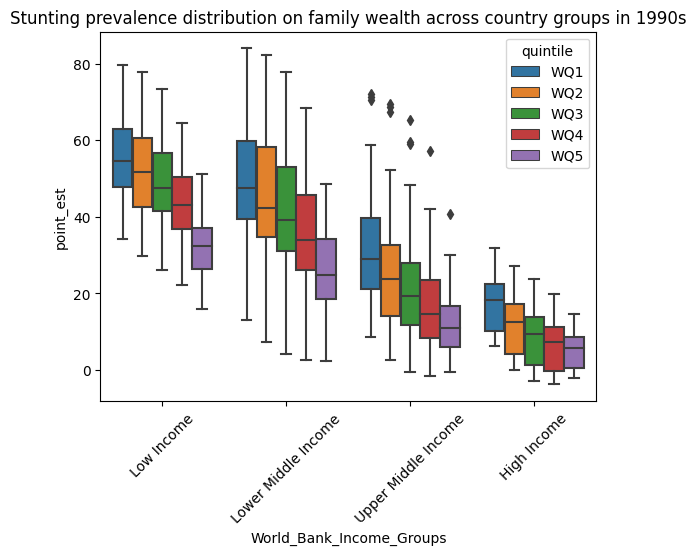

In [56]:
sns.boxplot(data=df_wealth_box[df_wealth_box['year_group']=='90s'], x='World_Bank_Income_Groups', y='point_est', hue='quintile')
plt.xticks(rotation=45)
plt.title("Stunting prevalence distribution on family wealth across country groups in 1990s")

Text(0.5, 1.0, 'Stunting prevalence distribution on family wealth across country groups in 2000s')

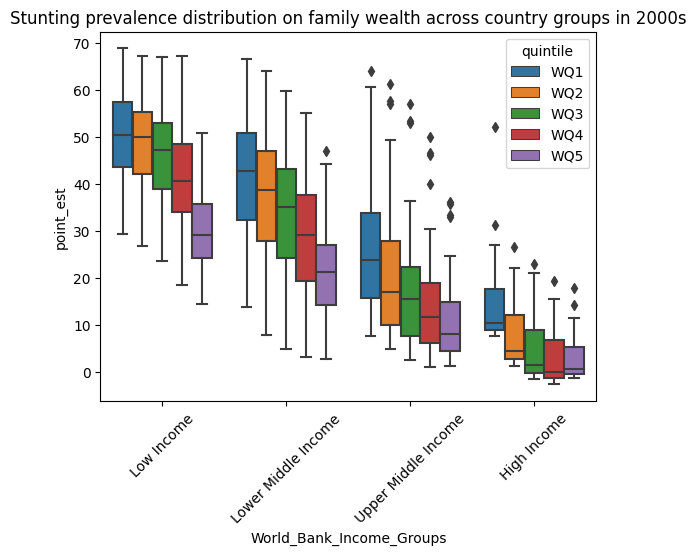

In [57]:
sns.boxplot(data=df_wealth_box[df_wealth_box['year_group']=='2000s'], x='World_Bank_Income_Groups', y='point_est', 
            hue='quintile', order=['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'])
plt.xticks(rotation=45)
plt.title("Stunting prevalence distribution on family wealth across country groups in 2000s")

Text(0.5, 1.0, 'Stunting prevalence distribution on family wealth across country groups in 2010s')

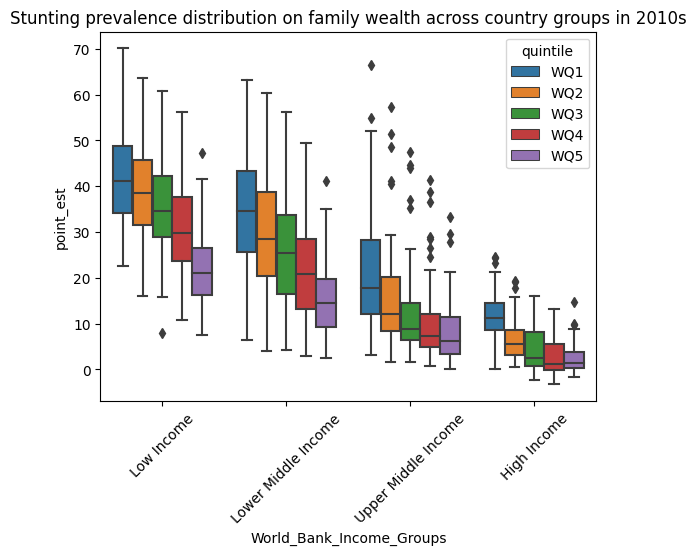

In [58]:
sns.boxplot(data=df_wealth_box[df_wealth_box['year_group']=='2010+'], x='World_Bank_Income_Groups', y='point_est', 
            hue='quintile', order=['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'])
plt.xticks(rotation=45)
plt.title("Stunting prevalence distribution on family wealth across country groups in 2010s")

### The income level of the family of the child has more significance than the income level of the country the child belongs to. 
### Children in the lowest quintile (WQ1) always have higher levels of stunting than the wealthiest in countries of lesser income. 
### Least progress has been made in reducing the numbers of stunted children in low income countries. 
### Improvement has been accelerated in the upper middle income countries 


## KDE plot across age

In [59]:
ftrs_sel = ['World_Bank_Income_Groups', 'year_group', '0_to_5_months_Point_Estimate',
       '6_to_11_months_Point_Estimate', '12_to_23_months_Point_Estimate',
       '0_to_23_months_Point_Estimate', '24_to_35_months_Point_Estimate',
       '36_to_47_months_Point_Estimate', '48_to_59_months_Point_Estimate',
       '24_to_59_months_Point_Estimate', 'National_Point_Estimate']
df_age = df_clean[ftrs_sel]

In [60]:
df_age_box = pd.melt(df_age, id_vars=['World_Bank_Income_Groups', 'year_group'], 
                        value_vars=['0_to_5_months_Point_Estimate',
       '6_to_11_months_Point_Estimate', '12_to_23_months_Point_Estimate',
       '24_to_59_months_Point_Estimate', 'National_Point_Estimate'])
df_age_box.rename(columns={'variable':'age', 'value':'point_est'}, inplace=True)

In [61]:
df_age_box['age'] = df_age_box['age'].apply(lambda x: 'Point_Estimate' if x=='National_Point_Estimate' else x)
df_age_box['age'].value_counts()

0_to_5_months_Point_Estimate      1051
6_to_11_months_Point_Estimate     1051
12_to_23_months_Point_Estimate    1051
24_to_59_months_Point_Estimate    1051
Point_Estimate                    1051
Name: age, dtype: int64

<AxesSubplot: xlabel='point_est', ylabel='Density'>

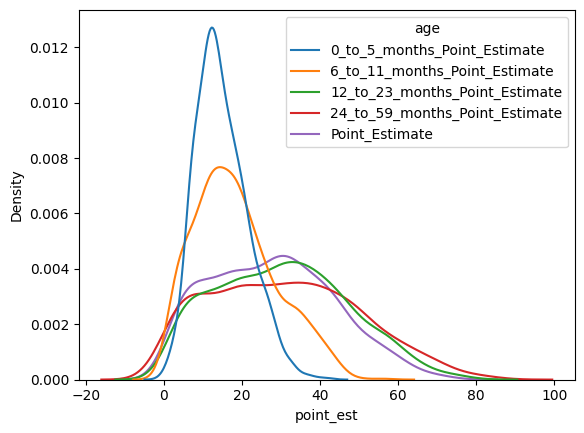

In [62]:
sns.kdeplot(data=df_age_box, x='point_est', hue='age')

### Low Income groups

Text(0.5, 1.0, 'Stunting across different ages in low income groups - 1990s')

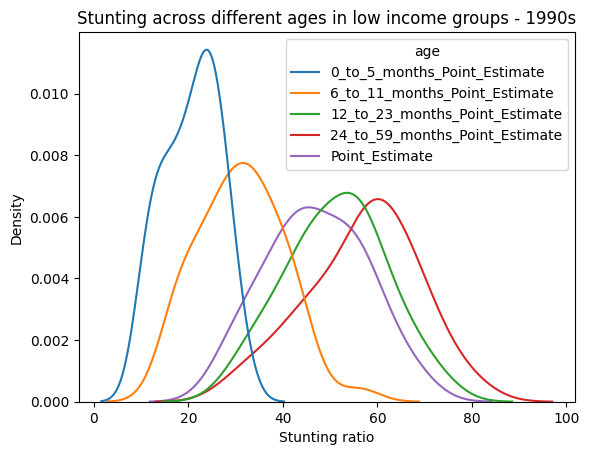

In [65]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Low Income') & 
                            (df_age_box['year_group']=='90s')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in low income groups - 1990s")


Text(0.5, 1.0, 'Stunting across different ages in low income groups - 2000s')

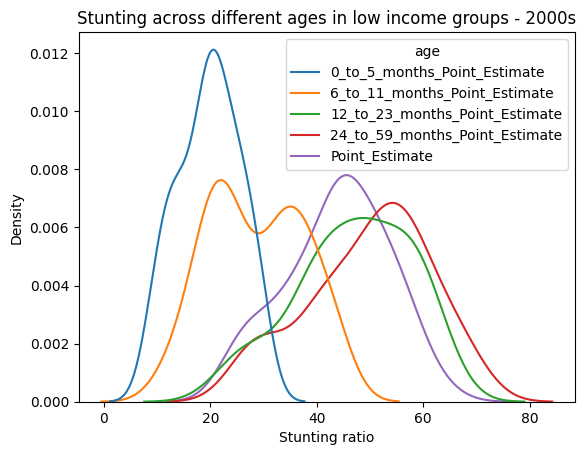

In [66]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Low Income') & 
                            (df_age_box['year_group']=='2000s')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in low income groups - 2000s")

Text(0.5, 1.0, 'Stunting across different ages in low income groups - 2010s')

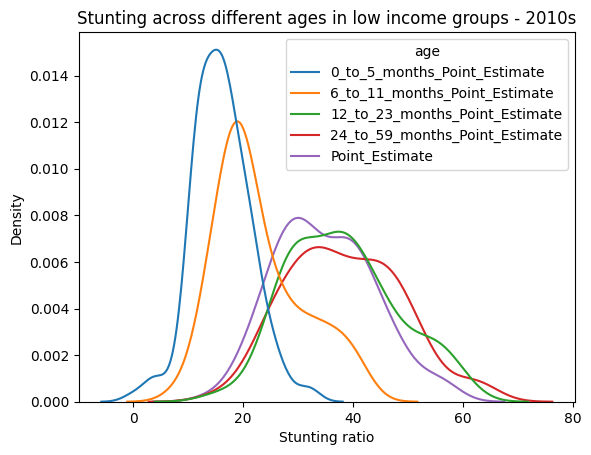

In [67]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Low Income') & 
                            (df_age_box['year_group']=='2010+')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in low income groups - 2010s")

### Stunting prevalent among older children  - 12-59 months old 
### Stunting numbers across 0-5 month old children lowest; indicating that probably breastfeeding plays an important factor in child nutrition in the initial months. 


### Lower Middle Income group

Text(0.5, 1.0, 'Stunting across different ages in lower middle income group-1990s')

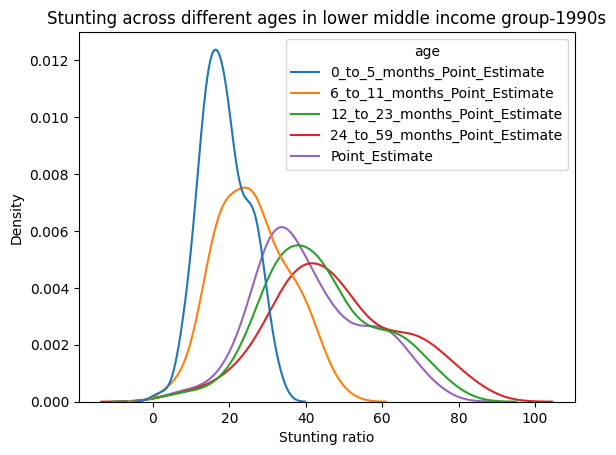

In [68]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Lower Middle Income') & 
                            (df_age_box['year_group']=='90s')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in lower middle income group-1990s")

Text(0.5, 1.0, 'Stunting across different ages in lower middle income group-2000s')

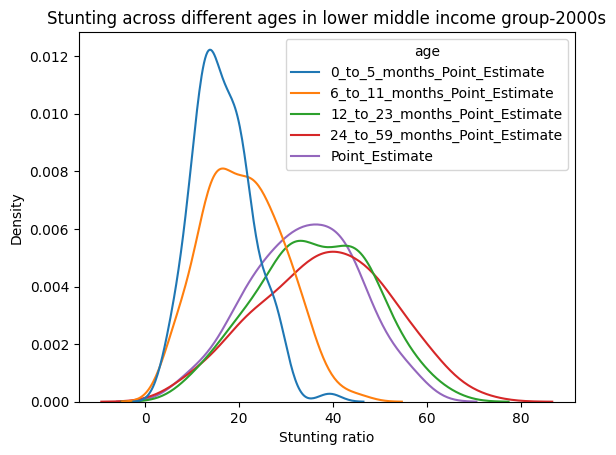

In [69]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Lower Middle Income') & 
                            (df_age_box['year_group']=='2000s')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in lower middle income group-2000s")

Text(0.5, 1.0, 'Stunting across different ages in lower middle income group-2010s')

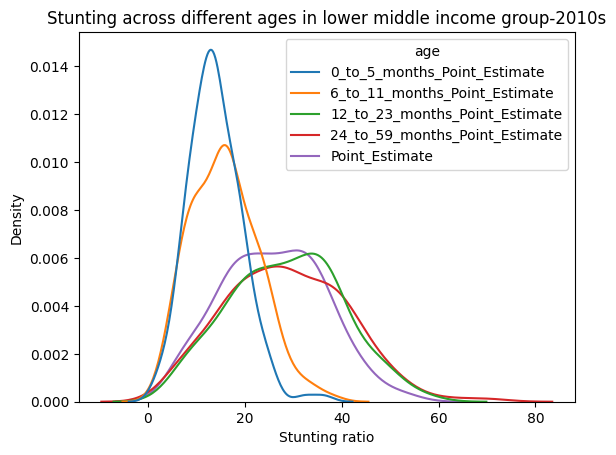

In [70]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Lower Middle Income') & 
                            (df_age_box['year_group']=='2010+')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in lower middle income group-2010s")

### Good progress made in reducing stunting numbers among children of 6-11 months old
### Reducing stunting numbers in children between 12-59 months old has larger impact in reducing overall stunting numbers 


### Upper Middle Income

Text(0.5, 1.0, 'Stunting across different ages in upper middle income group-1990s')

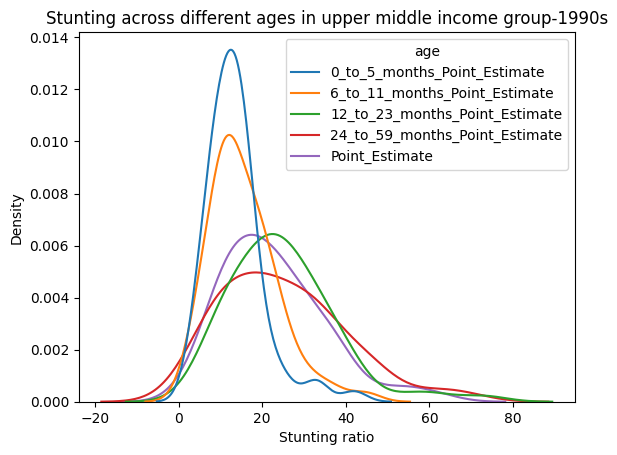

In [71]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Upper Middle Income') & 
                            (df_age_box['year_group']=='90s')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in upper middle income group-1990s")

Text(0.5, 1.0, 'Stunting across different ages in upper middle income group-2000s')

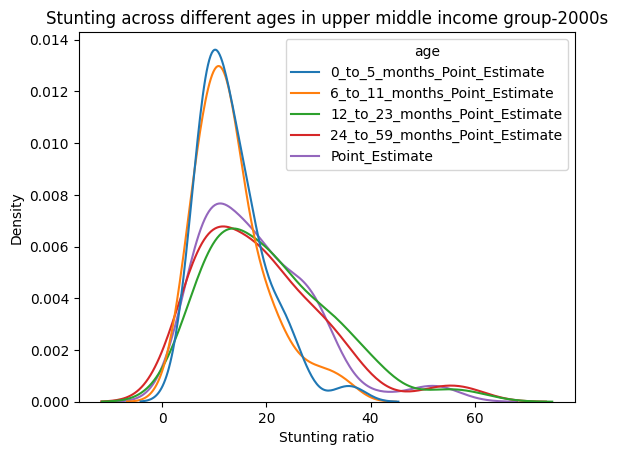

In [72]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Upper Middle Income') & 
                            (df_age_box['year_group']=='2000s')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in upper middle income group-2000s")

Text(0.5, 1.0, 'Stunting across different ages in upper middle income group-2010s')

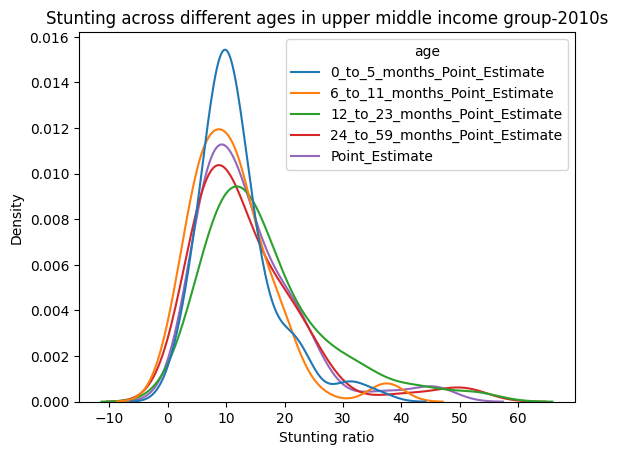

In [73]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Upper Middle Income') & 
                            (df_age_box['year_group']=='2010+')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in upper middle income group-2010s")

### Upper middle income countries have made phenomenal progress in reducing the number of 12-59 month stunted children in the 2010s 
### There is very little effect of the age of the child in the possibility of it being stunted by the 2010s; marginal differences in distribution across age groups 


### High Income

Text(0.5, 1.0, 'Stunting across different ages in upper middle income group-1990s')

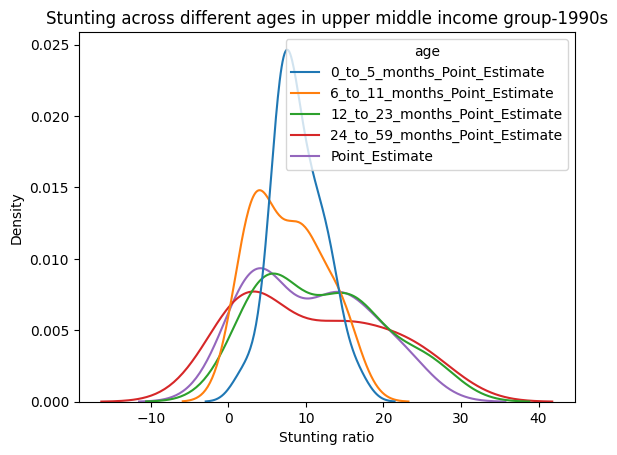

In [74]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='High Income') & 
                            (df_age_box['year_group']=='90s')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in upper middle income group-1990s")

Text(0.5, 1.0, 'Stunting across different ages in upper middle income group-2000s')

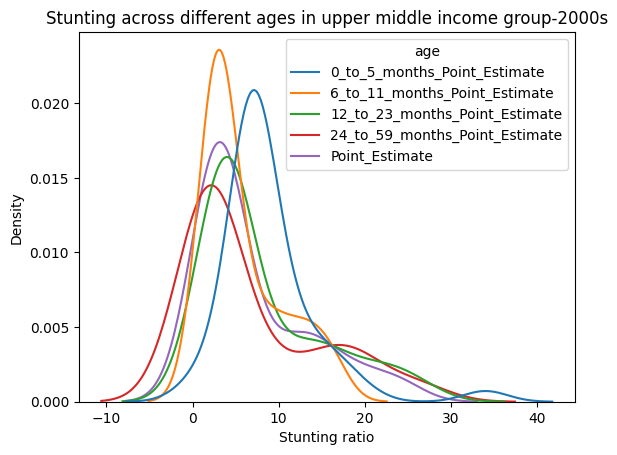

In [75]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='High Income') & 
                            (df_age_box['year_group']=='2000s')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in upper middle income group-2000s")

Text(0.5, 1.0, 'Stunting across different ages in upper middle income group-2010+')

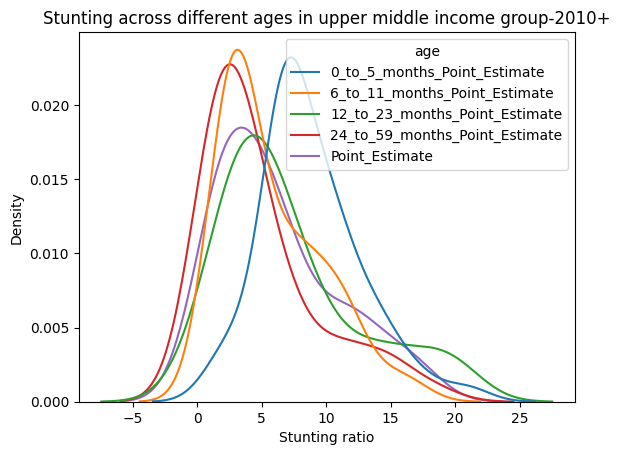

In [76]:
ax = sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='High Income') & 
                            (df_age_box['year_group']=='2010+')], x='point_est', hue='age')
ax.set(xlabel='Stunting ratio', ylabel='Density')
plt.title("Stunting across different ages in upper middle income group-2010+")

### In high income countries, the possibility of child being stunted reduces with its age, suggesting strong nutritional support available to growing children 
